In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
a =0.5 # variational parameter
num_samples= 1000 
learning_rate =0.01
num_iterations = 100

In [14]:
# Trial wavefunctions and its derivative
def psi_trial(x,a):
    return np.exp(-a*x**2)


def local_energy(x,a):
    kinetic  = -0.5*(-2*a + 4*a**2 * x**2)
    potential = 0.5 * x**2
    return kinetic+potential 

In [15]:
# defining monte carlo sampling function
def monte_carlo_sample(a,num_samples):
    # Generating samples using Metroplis-Hastings
    x = 0.0
    samples = []
    for _ in range (num_samples):
        x_new = x + np.random.normal(0,1.0)
        acceptance_ratio = (psi_trial(x_new,a)/ psi_trial(x,a))**2
        if np.random.rand()< acceptance_ratio:
            x = x_new
            samples.append(x)
    return np.array(samples)

In [16]:
# Variational Optimization
energies = []
parameters = []

for iteration in range (num_iterations):
    # sample position based on current trial wavefundtion
    samples = monte_carlo_sample(a,num_samples)
    # calculate local energy for each sample
    local_energies = local_energy(samples,a)
    # Estimate the energy as the average of local energies
    energy = np.mean(local_energies)
    energies.append(energy)
    parameters.append(a)
    # CAlcualte the gradient of energy with respect to "a"
    grad_E = -np.mean((samples**2 - 1 / (2*a)) *local_energies)

    # Update the parameter "a" using gradient decent
    a -= learning_rate*grad_E

    if iteration % 20 == 0:
        print(f"Iteration {iteration}, a {a :.4f}, Energy : {energy :.4f}")

Iteration 0, a 0.4973, Energy : 0.5000
Iteration 20, a 0.4497, Energy : 0.5087
Iteration 40, a 0.4057, Energy : 0.5064
Iteration 60, a 0.3677, Energy : 0.5307
Iteration 80, a 0.3383, Energy : 0.5072


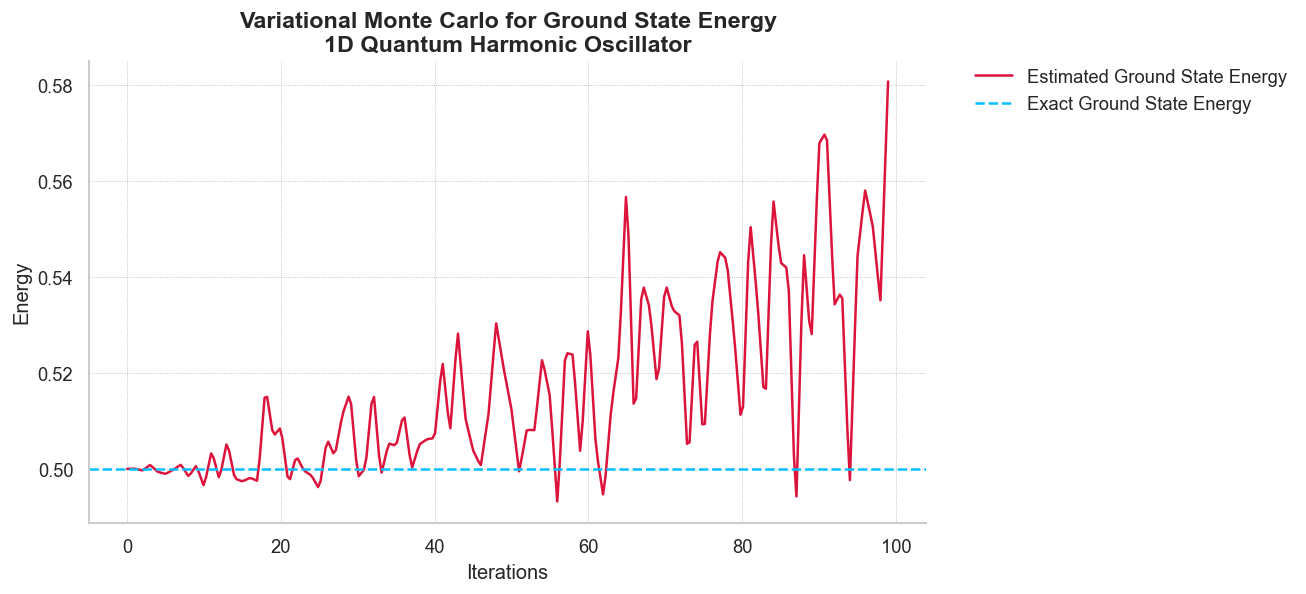

Final Estimated Ground State Energy: 0.5808
Final Variational Parameter a: 0.3198


In [ ]:

sns.set_style("whitegrid")


x_vals = np.linspace(0, len(energies) - 1, 300)
energies_smooth = np.interp(x_vals, np.arange(len(energies)), energies)


plt.figure(figsize=(9, 5), dpi=120)


plt.plot(x_vals, energies_smooth, color="crimson", linewidth=1.5, linestyle="-", label="Estimated Ground State Energy")


plt.axhline(0.5, color="deepskyblue", linestyle="--", linewidth=1.5, label="Exact Ground State Energy")


plt.xlabel("Iterations", fontsize=12, fontweight="medium")
plt.ylabel("Energy", fontsize=12, fontweight="medium")
plt.title("Variational Monte Carlo for Ground State Energy\n1D Quantum Harmonic Oscillator", 
          fontsize=14, fontweight="semibold")


plt.legend(fontsize=11, loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0, frameon=False)

plt.grid(color="gray", linestyle="dotted", linewidth=0.5, alpha=0.6)


sns.despine()


plt.show()


print(f"\033[1mFinal Estimated Ground State Energy:\033[0m {energies[-1]:.4f}")
print(f"\033[1mFinal Variational Parameter a:\033[0m {a:.4f}")